In [114]:
import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv("test_quant.csv")

In [160]:
df.head()

,timestamp,exchange,symbol,timestamp.1,local_timestamp,asks[0].price,asks[1].price,asks[2].price,asks[3].price,asks[4].price,...,bids[1].amount,bids[2].amount,bids[3].amount,bids[4].amount,bids[5].amount,bids[6].amount,bids[7].amount,bids[8].amount,bids[9].amount,datetime
0,2021-04-02 09:00:00.400,deribit,BTC-16APR21,1617354000424000,1617354000430645,60892.5,60893.0,60897.0,60897.5,60904.0,...,2820.0,1810.0,2690.0,319870.0,5270.0,2290.0,379100.0,100000.0,1830.0,2021-04-02 09:00:00.424
1,2021-04-02 09:00:00.500,deribit,BTC-16APR21,1617354000595000,1617354000606282,60892.5,60893.0,60897.5,60904.0,60913.5,...,2820.0,1810.0,2690.0,319870.0,5270.0,2290.0,379100.0,100000.0,1830.0,2021-04-02 09:00:00.595
2,2021-04-02 09:00:00.700,deribit,BTC-16APR21,1617354000788000,1617354000794703,60892.5,60893.0,60897.5,60904.0,60913.5,...,2820.0,1810.0,2690.0,319870.0,5270.0,2290.0,379100.0,100000.0,1830.0,2021-04-02 09:00:00.788
3,2021-04-02 09:00:00.800,deribit,BTC-16APR21,1617354000892000,1617354000905202,60892.5,60893.0,60897.5,60904.0,60913.5,...,2820.0,1810.0,2690.0,319870.0,5270.0,2290.0,379100.0,100000.0,1830.0,2021-04-02 09:00:00.892
4,2021-04-02 09:00:00.900,deribit,BTC-16APR21,1617354000917000,1617354000926413,60892.5,60897.5,60904.0,60913.5,60918.5,...,2820.0,1810.0,2690.0,319870.0,5270.0,2290.0,379100.0,100000.0,1830.0,2021-04-02 09:00:00.917


In [66]:
df['datetime'] = pd.to_datetime(df['timestamp.1'], unit='us')

In [174]:
idx_prices = range(5, 15)
idx_amount = range(15, 25)
df.iloc[:,idx_prices].head()

,asks[0].price,asks[1].price,asks[2].price,asks[3].price,asks[4].price,asks[5].price,asks[6].price,asks[7].price,asks[8].price,asks[9].price
0,60892.5,60893.0,60897.0,60897.5,60904.0,60913.5,60918.5,60938.5,60942.0,60948.5
1,60892.5,60893.0,60897.5,60904.0,60913.5,60918.5,60938.5,60942.0,60948.5,60953.5
2,60892.5,60893.0,60897.5,60904.0,60913.5,60918.5,60938.5,60942.0,60948.5,60953.5
3,60892.5,60893.0,60897.5,60904.0,60913.5,60918.5,60938.5,60942.0,60948.5,60953.5
4,60892.5,60897.5,60904.0,60913.5,60918.5,60938.5,60942.0,60948.5,60953.5,60993.5


In [79]:
df.datetime[250].minute
df.iloc[:,5:7].head()

,asks[0].price,asks[1].price
0,60892.5,60893.0
1,60892.5,60893.0
2,60892.5,60893.0
3,60892.5,60893.0
4,60892.5,60897.5


In [147]:
volume = 10000
v = 0
amount = np.zeros(10)
for j in range(len(idx_amount)):
    v = v + df.iloc[0, idx_amount[j]]
    if v > volume:
        amount[j] = df.iloc[0, idx_amount[j]] - v + volume 
        break;
    else:
        amount[j] = df.iloc[0, idx_amount[j]]      


In [250]:
res = {'id':[], 'time':[], 'amount':[], 'price':[], 'side':[], 'slippage':[]}

In [270]:
size = 1000000
side = 'sell'
if side == 'buy':
    idx_prices = range(5, 15)
    idx_amount = range(15, 25)
else:
    idx_prices = range(25,35)
    idx_amount = range(35, 45)
id = 1
mint = -1
res = {'id':[], 'time':[], 'amount':[], 'price':[], 'side':[], 'slippage':[], 'volume':[]}
for i in range(df.shape[0]):
    if df.datetime[i].minute != mint:
        mint = df.datetime[i].minute
        res['id'].append(id)
        id = id + 1
        res['time'].append(df['datetime'].iloc[i])
        res['side'].append(side)
        v = 0
        amount = np.zeros(10)
        for j in range(len(idx_amount)):
            v = v + df.iloc[i, idx_amount[j]]
            if v > size:
                amount[j] = df.iloc[i, idx_amount[j]] - v + size 
                break;
            else:
                amount[j] = df.iloc[i, idx_amount[j]]
        res['amount'].append(sum(df.iloc[i, idx_prices].values*amount))
        res['volume'].append(sum(amount))
        res['price'].append(sum(df.iloc[i, idx_prices].values*amount)/sum(amount))
        res['slippage'].append(df.iloc[i, idx_prices[0]])

In [271]:
res = pd.DataFrame.from_dict(res)
res['slippage'] = res['price'] - res['slippage']

In [272]:
res.loc[res['slippage']<=0,:]

,id,time,amount,price,side,slippage,volume
0,1,2021-04-02 09:00:00.424,6.076792e+10,60767.919660,sell,-60.080340,1000000.0
1,2,2021-04-02 09:01:00.299,5.727335e+10,60677.988235,sell,-94.511765,943890.0
2,3,2021-04-02 09:02:00.318,5.193579e+10,60701.729315,sell,-70.770685,855590.0
3,4,2021-04-02 09:03:00.146,6.069837e+10,60698.365060,sell,-65.634940,1000000.0
4,5,2021-04-02 09:04:00.253,4.928979e+10,60658.381427,sell,-72.618573,812580.0
...,...,...,...,...,...,...,...
56,57,2021-04-02 09:56:00.347,6.089633e+10,60896.328965,sell,-30.671035,1000000.0
57,58,2021-04-02 09:57:00.551,6.090950e+10,60909.496570,sell,-39.003430,1000000.0
58,59,2021-04-02 09:58:00.482,6.090913e+10,60909.127310,sell,-39.372690,1000000.0
59,60,2021-04-02 09:59:00.042,6.090754e+10,60907.537710,sell,-40.962290,1000000.0


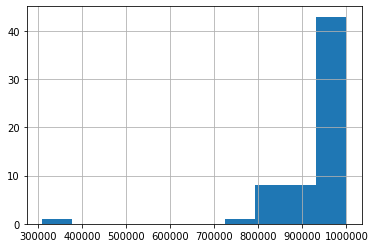

In [273]:
res['volume'].hist()

In [274]:
res.tail()

,id,time,amount,price,side,slippage,volume
56,57,2021-04-02 09:56:00.347,6.089633e+10,60896.328965,sell,-30.671035,1000000.0
57,58,2021-04-02 09:57:00.551,6.090950e+10,60909.496570,sell,-39.003430,1000000.0
58,59,2021-04-02 09:58:00.482,6.090913e+10,60909.127310,sell,-39.372690,1000000.0
59,60,2021-04-02 09:59:00.042,6.090754e+10,60907.537710,sell,-40.962290,1000000.0
60,61,2021-04-02 10:00:00.465,6.091897e+10,60918.971515,sell,-41.528485,1000000.0


In [269]:
sum(amount)

1000000.0

In [ ]:
idx